In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [87]:
df.duplicated().any()

False

In [84]:
df.Type.value_counts()

Others (Please Specify)                5509
By Hanging                             3514
Causes Not known                       3332
Other Causes (Please Specity)          3065
Family Problems                        3013
                                       ... 
Divorcee                                520
Post Graduate and Above                 507
By Machine                              504
Ideological Causes/Hero Worshipping     471
Illegitimate Pregnancy                  420
Name: Type, Length: 66, dtype: int64

In [9]:
df.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

In [88]:
df.State.value_counts()

Andhra Pradesh       5185
Karnataka            5115
Tamil Nadu           5054
Madhya Pradesh       5029
Maharashtra          4958
Uttar Pradesh        4954
Gujarat              4856
West Bengal          4596
Kerala               4509
Chhattisgarh         4368
Rajasthan            4324
Odisha               4179
Assam                3868
Haryana              3826
Delhi                3324
Jharkhand            3210
Bihar                3119
Punjab               2960
Himachal Pradesh     2650
Tripura              2451
Uttarakhand          2442
Goa                  2237
Jammu & Kashmir      2159
Puducherry           2124
Sikkim               1421
A & N Islands        1299
Meghalaya            1180
Chandigarh           1092
Arunachal Pradesh    1062
D & N Haveli          952
Mizoram               786
Manipur               609
Nagaland              587
Daman & Diu           579
Lakshadweep            46
Name: State, dtype: int64

In [31]:
df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')]

,State,Year,Type_code,Type,Gender,Age_group,Total
209476,Total (All India),2001,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,2391
209477,Total (All India),2001,Education_Status,Diploma,Female,0-100+,294
209478,Total (All India),2001,Education_Status,Matriculate/Secondary,Female,0-100+,5486
209479,Total (All India),2001,Education_Status,No Education,Female,0-100+,12817
209480,Total (All India),2001,Education_Status,Post Graduate and Above,Female,0-100+,192
...,...,...,...,...,...,...,...
210407,Total (Uts),2012,Social_Status,Never Married,Male,0-100+,569
210408,Total (Uts),2012,Social_Status,Married,Male,0-100+,1220
210409,Total (Uts),2012,Social_Status,Divorcee,Male,0-100+,2
210410,Total (Uts),2012,Social_Status,Widowed/Widower,Male,0-100+,7


In [33]:
df.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [34]:
df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
df.replace('By Other means (please specify)', 'By Other means', inplace=True)
df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [28]:
df = df[df['Total']!=0]

In [29]:
df[df['Total']==0]

,State,Year,Type_code,Type,Gender,Age_group,Total


In [36]:
df = df[(df.State!='Total (Uts)' )& (df.State!='Total (All India)') & (df.State!='Total (States)')]

### EDA

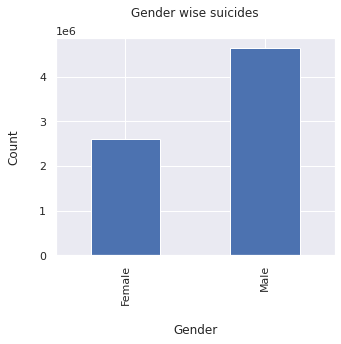

In [38]:
#Gender Suicide Frequency
gender = df.groupby('Gender').sum()['Total'].plot(kind = "bar", figsize=(5,4), title ="Gender wise suicides\n");
gender.set_xlabel('\nGender')
gender.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.cubehelix_palette(8);

Text(0, 0.5, 'Counts\n')

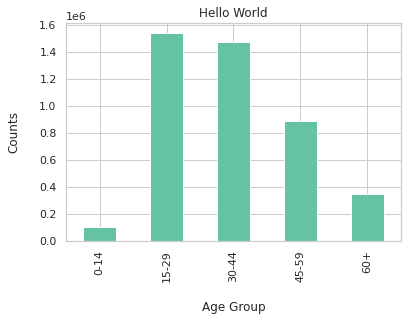

In [46]:
# Age Suicide Frequency
df_Age = df[df['Age_group']!='0-100+']

age = df_Age.groupby('Age_group').sum()['Total'].plot(kind = "bar");
plt.title('Hello World')
plt.xlabel('\nAge Group')
plt.ylabel('Counts\n')
# sns.set_style('whitegrid')

Middle Age group i.e between 15-44 have the highest number but, It' scary that even kids between age of 0 - 14 also commit suicide.

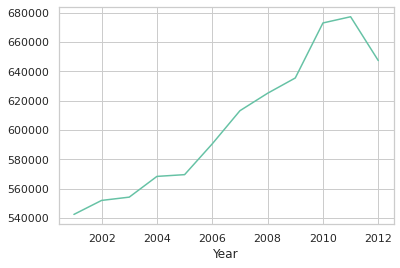

In [50]:
# Suicide rate every year

year = df.groupby('Year').sum()['Total'].plot(kind = 'line')









# year = df.groupby('Year').sum()['Total'].plot('line', figsize=(6,6), title = 'Suicide rate per year');
# year.set_xlabel('\nYear')
# year.set_ylabel('Count\n')
sns.set_style('whitegrid');

Suicide rate is sky rocketting from 2002 till almost 2010 but, it has droped from then.

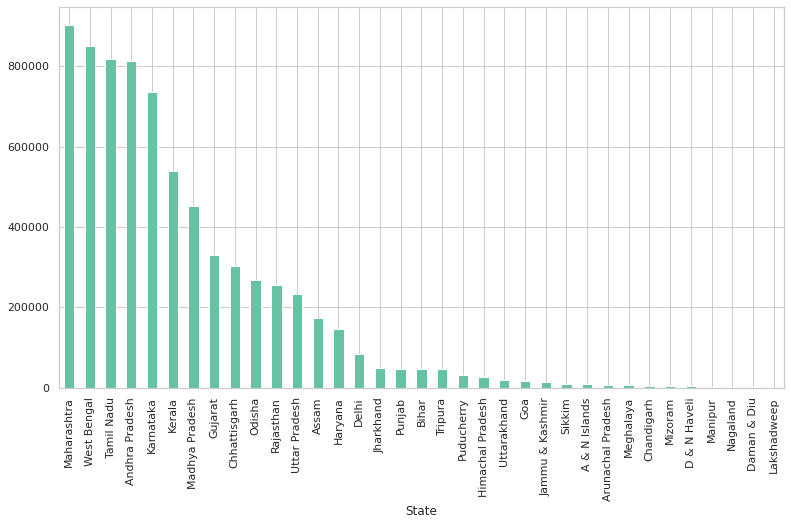

In [57]:
# State wise Suicide count

state = df.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)
state_fig = sort_state.plot(kind = 'bar', figsize = (13, 7))
# state_fig.set_xlabel('\nState')
# state_fig.set_ylabel('Count\n')
# sns.set_style('whitegrid')
# sns.set_palette('Set2');

Maharashtra, West Bengal and Tamil Nadu have the highest rate of suicide. 

In [70]:
# split df ny it's type code

cause = df[df['Type_code'] == 'Causes']
edu_status = df[df['Type_code'] == 'Education_Status']
means_adpt = df[df['Type_code'] == 'Means_adopted']
prof = df[df['Type_code'] == 'Professional_Profile']
soc_status = df[df['Type_code'] == 'Social_Status']

In [68]:
df.Type_code.value_counts()

Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Education_Status         5602
Social_Status            3349
Name: Type_code, dtype: int64

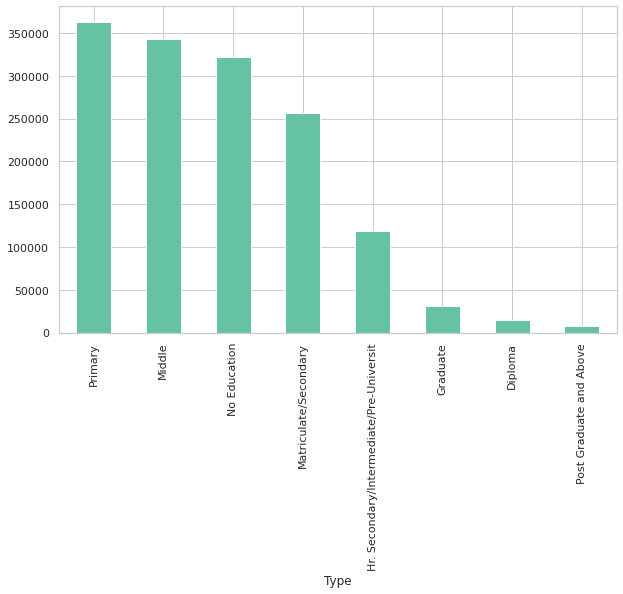

In [77]:
# plot by cause
temp = edu_status.groupby('Type').sum()['Total']
temp.sort_values(ascending=False).plot(kind = 'bar', figsize = (10, 6))

Most of the cause are unknown but Family problems and Prolonged illness is at the top.

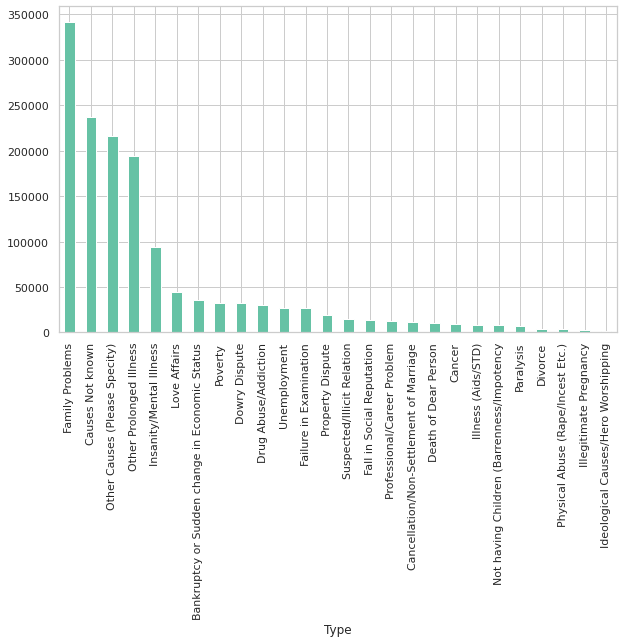

In [78]:
temp = cause.groupby('Type').sum()['Total']
temp.sort_values(ascending=False).plot(kind = 'bar', figsize = (10, 6))

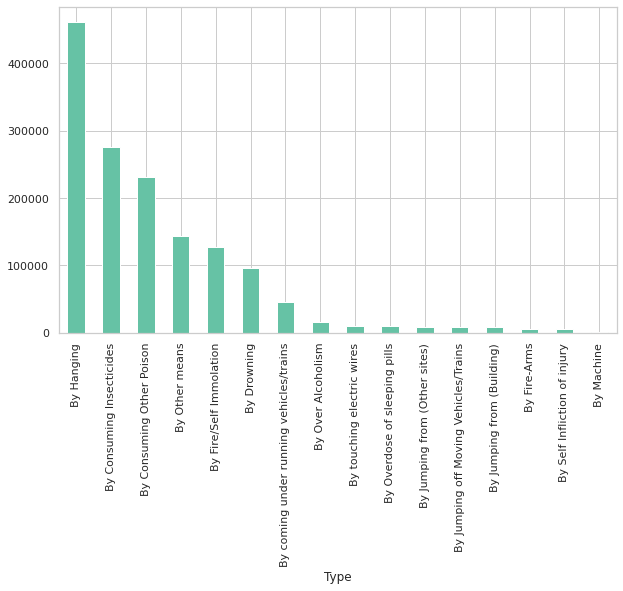

In [79]:
temp = means_adpt.groupby('Type').sum()['Total']
temp.sort_values(ascending=False).plot(kind = 'bar', figsize = (10, 6))

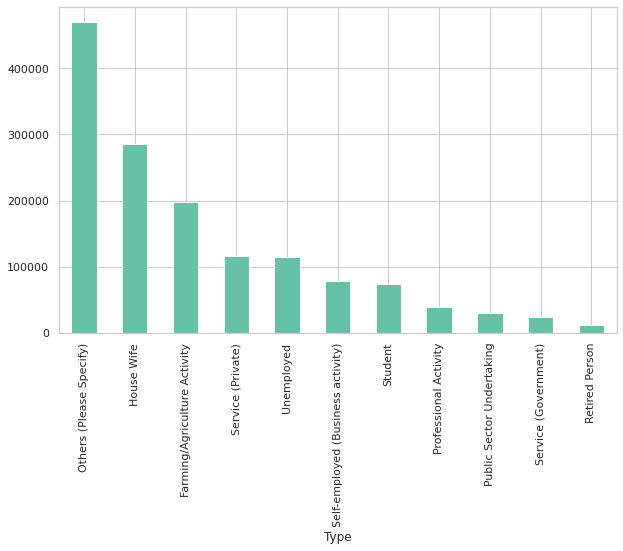

In [80]:
temp = prof.groupby('Type').sum()['Total']
temp.sort_values(ascending=False).plot(kind = 'bar', figsize = (10, 6))

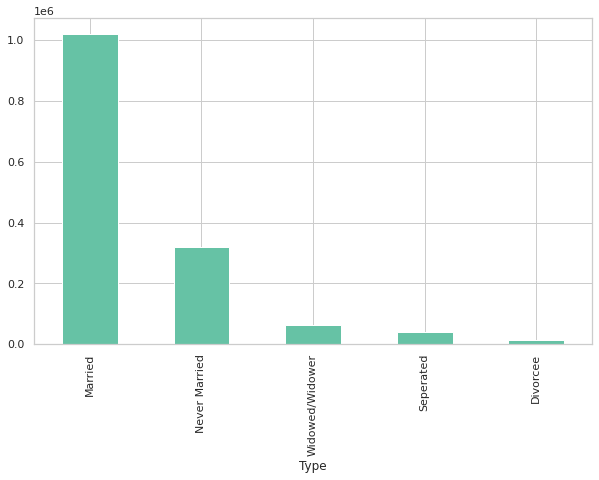

In [81]:
temp = soc_status.groupby('Type').sum()['Total']
temp.sort_values(ascending=False).plot(kind = 'bar', figsize = (10, 6))

People with primary or no education are high in number.

Hanging, Consuming Insecticides is more common but, most of other means are unknown.

Most of the professional profile is unknown but house wife comes in second.

Family Problems, House Wife and now Married these are at the top when it comes to the cause, professional profile and social status respectively.

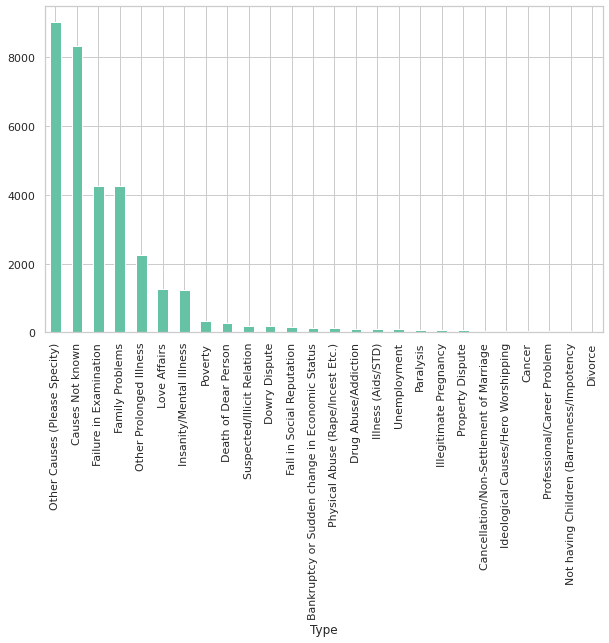

In [82]:
age_lower = df[df['Age_group']== '0-14']
age_lower_cause = age_lower[age_lower['Type_code'] == 'Causes']
temp = age_lower_cause.groupby('Type').sum()['Total']
temp.sort_values(ascending=False).plot(kind = 'bar', figsize = (10, 6))

Most of cause is unknown but, Failure in Examination is at the top.

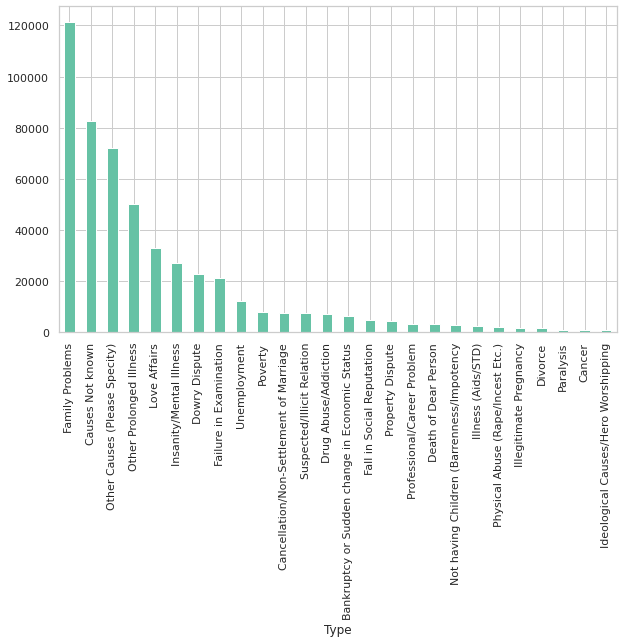

In [83]:
age_middle = df[df['Age_group']== '15-29']
age_middle_cause = age_middle[age_middle['Type_code'] == 'Causes']
temp = age_middle_cause.groupby('Type').sum()['Total']
temp.sort_values(ascending=False).plot(kind = 'bar', figsize = (10, 6))

Family Problems, Illness and Love affairs are at the top while, most of the reasons are unknown yet.